# What is a Time series
- Set of observations recorded over time, typically with a regular frequency like hourly, daily, monthly

In [1]:
import pandas as pd

df = pd.read_csv("./book_sales.csv", 
                 index_col='Date',parse_dates=["Date"],)

df.head()

,Paperback,Hardcover
Date,,
2000-04-01,199,139
2000-04-02,172,128
2000-04-03,111,172
2000-04-04,209,139
2000-04-05,161,191


In [2]:
df = df.drop("Paperback", axis=1)

# Linear Regression with Time Series
- Linear regression as target is the weighthed sum of predictors + a bias (constant)
- weights are fitted during the training
- trianing objective is to minimize the *ordinary lest squares* of true and predicted values for target 
- Bias also called intercept

## Time-step features
- Feature unique to time series: time-step features and lag features
- Time-step features are features we can derive directly from the time index
- Most basic is time dummy (counts off time steps in the series from beginning to end)

- Allows you to model time dependence
- A series is time dependent if its values can be predicted fromt he time they ocurred
- In the example we can say that sales later in the month/years are lower thant before

In [3]:
import numpy as np

# min date
min_date = df.index.min()

# int days series
days_since_start = (df.index - min_date).days.astype(int)

df["Time"] = days_since_start

df.head(10)

,Hardcover,Time
Date,,
2000-04-01,139,0
2000-04-02,128,1
2000-04-03,172,2
2000-04-04,139,3
2000-04-05,191,4
2000-04-06,168,5
2000-04-07,170,6
2000-04-08,145,7
2000-04-09,184,8


Model with only the time dummy feature would be:

`target = weight * days_since_start + bias`

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11,4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight='bold',
    labelsize='large',
    titleweight='bold',
    titlesize=16,
    titlepad=10,
)
%config InlineBackedn.figure_format = 'retina'

C:\Users\gransotto gustavo\AppData\Local\Temp\ipykernel_12344\2920803393.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


Text(0.5, 1.0, 'Time Plot of Hardcover Sales')

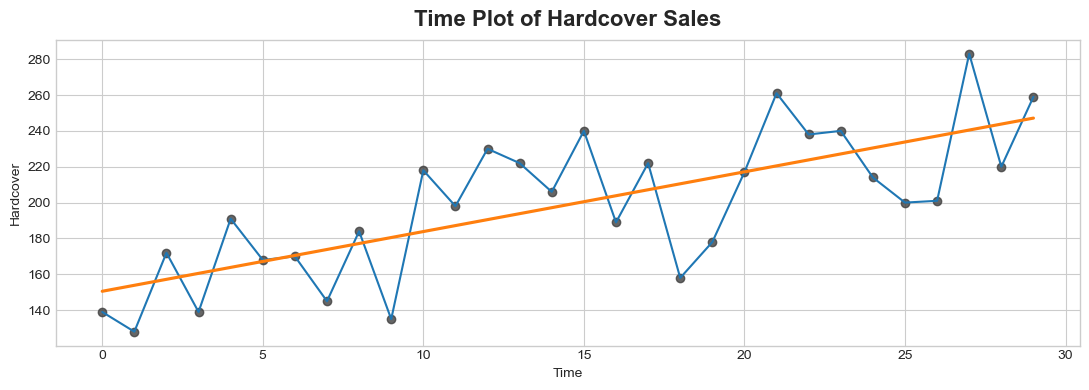

In [5]:
fig, ax = plt.subplots()

ax.plot("Time", "Hardcover", data=df)
ax = sns.regplot(x="Time", y="Hardcover", data=df, 
                 ci=None, scatter_kws=dict(color='0.25'))

ax.set_title("Time Plot of Hardcover Sales")

## Lag features
- Shift obesrvation of the target series so that they appear to have ocurred later in time
- Shift N steps (1 day, 1 week, a month)

Model ends up like that:

`target = weight * lag + bias`

- Allows you to model **serial dependence**
- Serial dependence on a time series is when an observation can be predicted from previous observations

In [6]:
df["Lag_1"] = df["Hardcover"].shift(1)
df

,Hardcover,Time,Lag_1
Date,,,
2000-04-01,139,0,NaN
2000-04-02,128,1,139.0
2000-04-03,172,2,128.0
2000-04-04,139,3,172.0
2000-04-05,191,4,139.0
2000-04-06,168,5,191.0
2000-04-07,170,6,168.0
2000-04-08,145,7,170.0
2000-04-09,184,8,145.0


In [7]:
df = df.reindex(columns=["Hardcover","Lag_1"])

In [8]:
df

,Hardcover,Lag_1
Date,,
2000-04-01,139,NaN
2000-04-02,128,139.0
2000-04-03,172,128.0
2000-04-04,139,172.0
2000-04-05,191,139.0
2000-04-06,168,191.0
2000-04-07,170,168.0
2000-04-08,145,170.0
2000-04-09,184,145.0


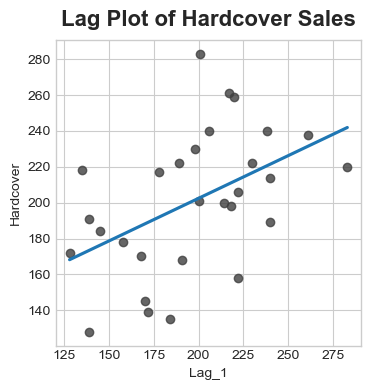

In [9]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='Hardcover', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Hardcover Sales');

# Eaxmple tunnel traffic
- Tunnel traffic is a time series describing the number of vehicles travelling through the Baregg Tunnel in Switzerland each day from November 2003 to November 2005. In this example we'll get some practice applying linear regression to time-step features and lag features.

In [10]:
# Import core modules
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [11]:
! head -5 tunnel.csv

Day,NumVehicles
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352


In [16]:
# Read data
tunnel = pd.read_csv("./tunnel.csv", parse_dates=['Day'])
tunnel

,Day,NumVehicles
0,2003-11-01,103536
1,2003-11-02,92051
2,2003-11-03,100795
3,2003-11-04,102352
4,2003-11-05,106569
...,...,...
742,2005-11-12,104646
743,2005-11-13,94424
744,2005-11-14,112165
745,2005-11-15,114296


In [17]:
# Create a time series in pandas by setting the index to a date column
tunnel = tunnel.set_index("Day")

tunnel.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 747 entries, 2003-11-01 to 2005-11-16
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   NumVehicles  747 non-null    int64
dtypes: int64(1)
memory usage: 11.7 KB


In [18]:
# By default, Pandas creates a DatetimeIndex with dtype Timestamp equivalent 
# to np.datetime64, represengint a time series as a sequence of measurements 
# taken at single moments. A `PeriodIndex`, on the other hand, represents a 
# time series as a sequence of quantities accumulated over periods of time. 
# Periods are often easier to work with, so that's what we'll use in this course.

tunnel = tunnel.to_period()
tunnel.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 747 entries, 2003-11-01 to 2005-11-16
Freq: D
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   NumVehicles  747 non-null    int64
dtypes: int64(1)
memory usage: 11.7 KB


In [20]:
tunnel.head(5)

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


## Time-step feature
- Let's check whether there is time dependence in NumVehicles

In [33]:
df = tunnel.copy()

df["Time"] = (df.index.to_timestamp() - df.index.min().to_timestamp()).days

df

,NumVehicles,Time
Day,,
2003-11-01,103536,0
2003-11-02,92051,1
2003-11-03,100795,2
2003-11-04,102352,3
2003-11-05,106569,4
...,...,...
2005-11-12,104646,742
2005-11-13,94424,743
2005-11-14,112165,744


In [34]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

C:\Users\gransotto gustavo\AppData\Local\Temp\ipykernel_12344\1211678308.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [36]:
from sklearn.linear_model import LinearRegression

In [41]:
# Train data

X = df.loc[:,['Time']]
y = df.loc[:, 'NumVehicles']

# Train the model

model = LinearRegression()
model.fit(X,y)

# Store the fitted values as time series with the same time index as the training data
y_pred = pd.Series(model.predict(X), index=X.index)

The model actually created is approximately `Vehicles = 22.5 *  Time + 98176`
Plotting the fitted values over time show us how fitting linear regression to the time dummy creates the rend line defined by this equation

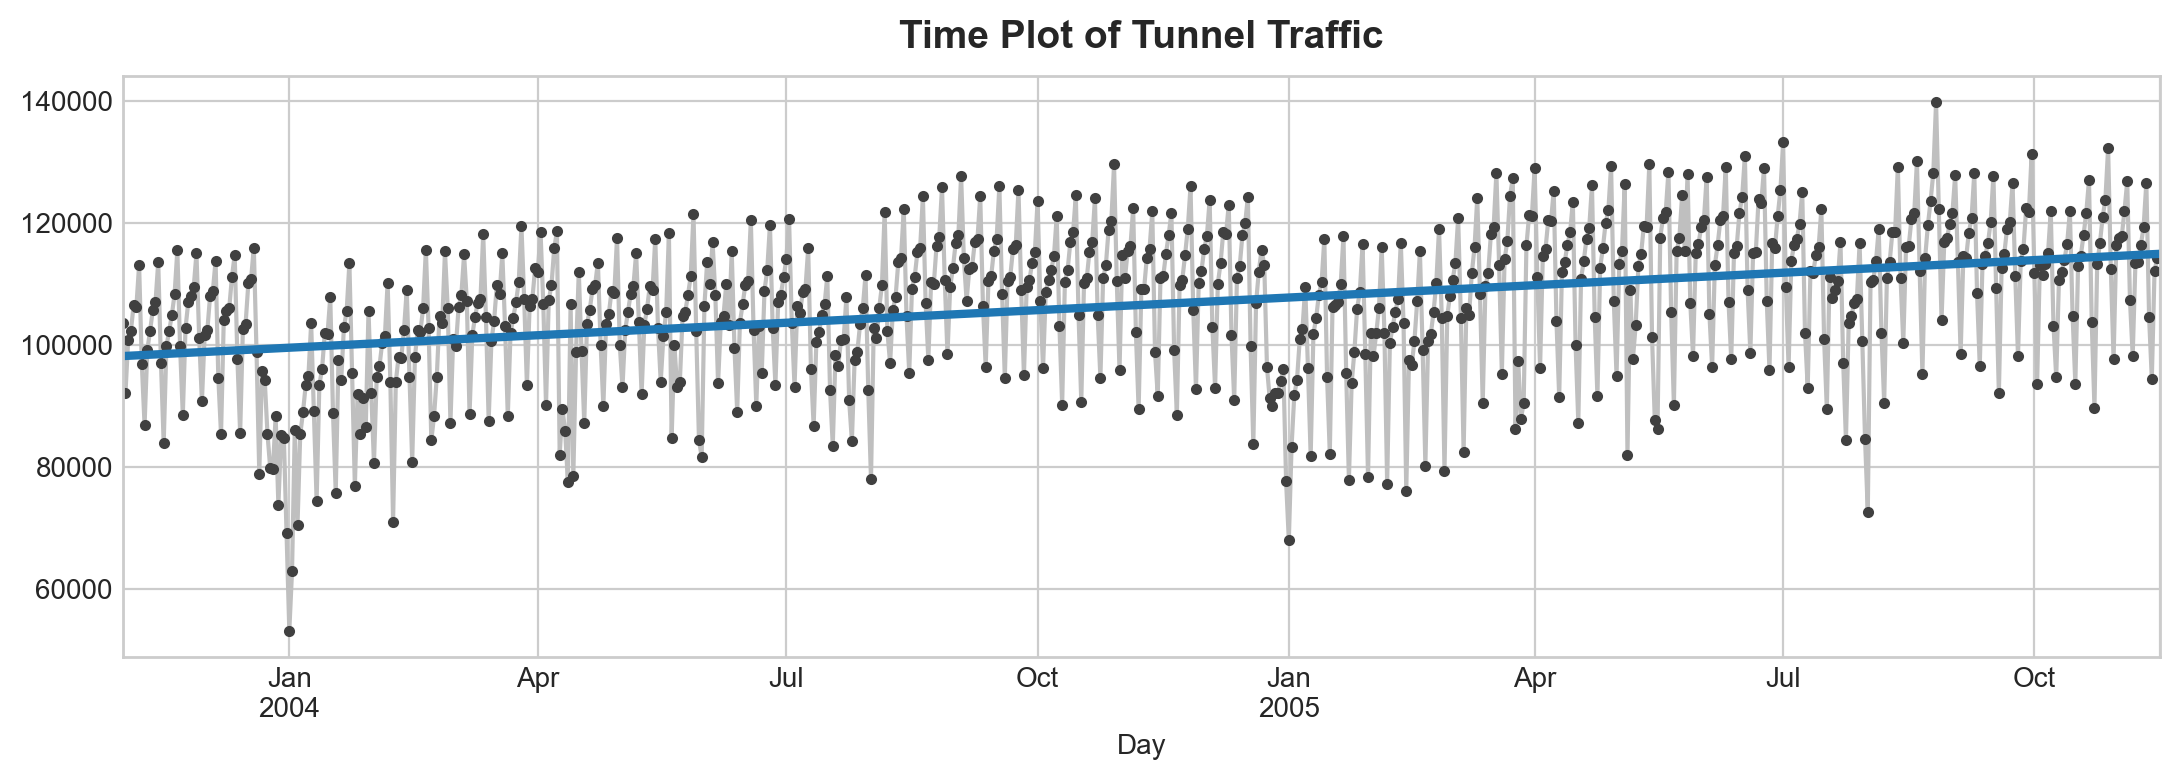

In [42]:
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Tunnel Traffic');

## Lag features
- Let's check for serial dependence

In [43]:
df['Lag_1'] = df['NumVehicles'].shift(1)
df.head()

,NumVehicles,Time,Lag_1
Day,,,
2003-11-01,103536,0,NaN
2003-11-02,92051,1,103536.0
2003-11-03,100795,2,92051.0
2003-11-04,102352,3,100795.0
2003-11-05,106569,4,102352.0


In [46]:
from sklearn.linear_model import LinearRegression

X = df.loc[:, ['Lag_1']]
X.dropna(inplace=True) # drop missing values in the feature set
y = df.loc[:, 'NumVehicles']

y, X = y.align(X, join='inner') # drop corresponding values in target

model = LinearRegression()
model.fit(X,y)

y_pred = pd.Series(model.predict(X), index=X.index)

Text(0.5, 1.0, 'Lag Plot of tunnel Traffic')

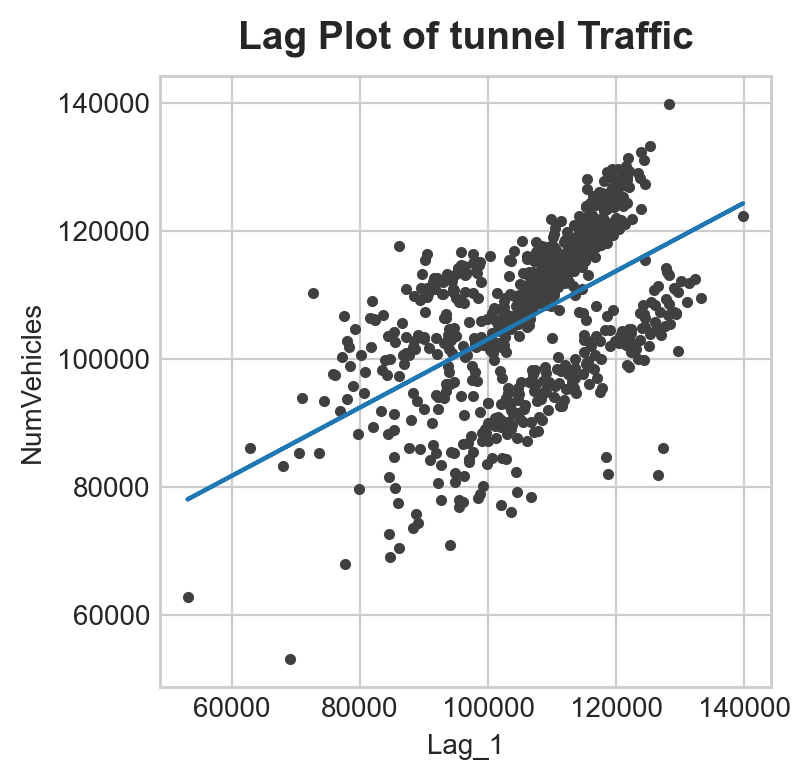

In [54]:
fig, ax = plt.subplots()

ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('NumVehicles')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of tunnel Traffic')

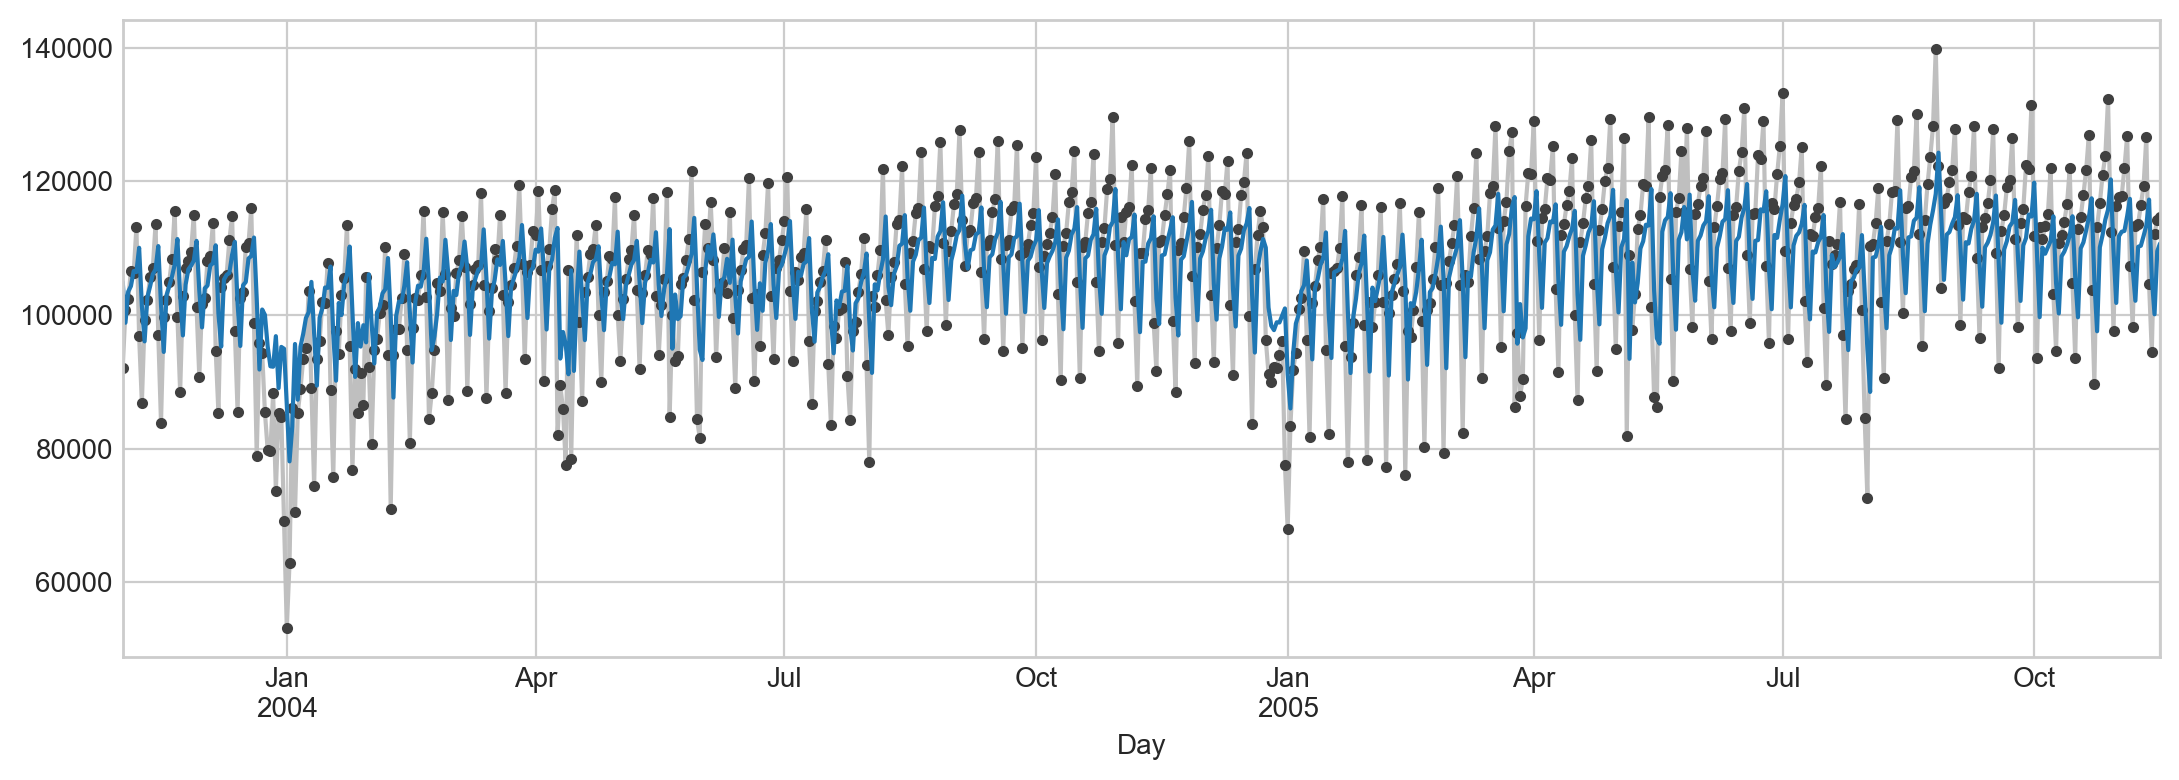

In [55]:
ax = y.plot(**plot_params)
ax = y_pred.plot()